In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', 500)

In [3]:
df_weather = pd.read_csv('/content/drive/MyDrive/2nd sem/Data 228/DATA 228 Project Files/data/france_weather.csv')
df_power = pd.read_csv('/content/drive/MyDrive/2nd sem/Data 228/DATA 228 Project Files/data/france_production.csv')

#Exploring Weather

In [4]:
display(df_weather)

dt                         dt_iso  timezone city_name  \
0      1595376000  2020-07-22 00:00:00 +0000 UTC      7200    France   
1      1595379600  2020-07-22 01:00:00 +0000 UTC      7200    France   
2      1595383200  2020-07-22 02:00:00 +0000 UTC      7200    France   
3      1595386800  2020-07-22 03:00:00 +0000 UTC      7200    France   
4      1595390400  2020-07-22 04:00:00 +0000 UTC      7200    France   
...           ...                            ...       ...       ...   
25771  1688151600  2023-06-30 19:00:00 +0000 UTC      7200    France   
25772  1688155200  2023-06-30 20:00:00 +0000 UTC      7200    France   
25773  1688158800  2023-06-30 21:00:00 +0000 UTC      7200    France   
25774  1688162400  2023-06-30 22:00:00 +0000 UTC      7200    France   
25775  1688166000  2023-06-30 23:00:00 +0000 UTC      7200    France   

             lat       lon   temp  visibility  dew_point  feels_like  \
0      46.227638  2.213749  17.31         NaN      13.83       17.19   
1      46.227638  2.213749  16.65         NaN      13.00       16.43   
2      46.227638  2.213749  15.85         NaN      12.22       15.55   
3      46.227638  2.213749  15.05         NaN      12.19       14.78   
4      46.227638  2.213749  13.95         NaN      11.82       13.67   
...          ...       ...    ...         ...        ...         ...   
25771  46.227638  2.213749  17.41         NaN       9.32       16.75   
25772  46.227638  2.213749  16.00         NaN      10.32       15.46   
25773  46.227638  2.213749  15.41         NaN      11.01       14.96   
25774  46.227638  2.213749  15.10         NaN      11.68       14.75   
25775  46.227638  2.213749  14.86         NaN      12.00       14.57   

       temp_min  temp_max  pressure  sea_level  grnd_level  humidity  \
0         16.45     18.44      1021        NaN         NaN        80   
1         15.89     17.89      1021        NaN         NaN        79   
2         15.34     16.78      1020        NaN         NaN        79   
3         14.78     15.16      1020        NaN         NaN        83   
4         13.67     15.11      1020        NaN         NaN        87   
...         ...       ...       ...        ...         ...       ...   
25771     16.22     17.90      1017        NaN         NaN        59   
25772     15.11     16.36      1018        NaN         NaN        69   
25773     14.98     15.68      1018        NaN         NaN        75   
25774     14.72     15.35      1018        NaN         NaN        80   
25775     14.53     15.10      1018        NaN         NaN        83   

       wind_speed  wind_deg  wind_gust  rain_1h  rain_3h  snow_1h  snow_3h  \
0            1.42        20        NaN     2.05      NaN      NaN      NaN   
1            0.67        35        NaN     0.39      NaN      NaN      NaN   
2            1.25       350        NaN      NaN      NaN      NaN      NaN   
3            1.61       358        NaN      NaN      NaN      NaN      NaN   
4            1.44       349        NaN      NaN      NaN      NaN      NaN   
...           ...       ...        ...      ...      ...      ...      ...   
25771        4.88       285        NaN      NaN      NaN      NaN      NaN   
25772        4.27       272        NaN      NaN      NaN      NaN      NaN   
25773        3.81       257        NaN      NaN      NaN      NaN      NaN   
25774        5.32       248        NaN      NaN      NaN      NaN      NaN   
25775        5.14       247        NaN      NaN      NaN      NaN      NaN   

       clouds_all  weather_id weather_main weather_description weather_icon  
0              99         501         Rain       moderate rain          10n  
1              77         500         Rain          light rain          10n  
2              24         801       Clouds          few clouds          02n  
3               1         800        Clear        sky is clear          01n  
4               5         800        Clear        sky is clear          01n  
...           .

In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25776 entries, 0 to 25775
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   25776 non-null  int64  
 1   dt_iso               25776 non-null  object 
 2   timezone             25776 non-null  int64  
 3   city_name            25776 non-null  object 
 4   lat                  25776 non-null  float64
 5   lon                  25776 non-null  float64
 6   temp                 25776 non-null  float64
 7   visibility           0 non-null      float64
 8   dew_point            25776 non-null  float64
 9   feels_like           25776 non-null  float64
 10  temp_min             25776 non-null  float64
 11  temp_max             25776 non-null  float64
 12  pressure             25776 non-null  int64  
 13  sea_level            0 non-null      float64
 14  grnd_level           0 non-null      float64
 15  humidity             25776 non-null 

In [6]:
df_weather.isna().sum()

dt                         0
dt_iso                     0
timezone                   0
city_name                  0
lat                        0
lon                        0
temp                       0
visibility             25776
dew_point                  0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              25776
grnd_level             25776
humidity                   0
wind_speed                 0
wind_deg                   0
wind_gust              25776
rain_1h                21914
rain_3h                25776
snow_1h                25571
snow_3h                25776
clouds_all                 0
weather_id                 0
weather_main               0
weather_description        0
weather_icon               0
dtype: int64

In [7]:
df_weather.describe()

dt      timezone           lat           lon          temp  \
count  2.577600e+04  25776.000000  2.577600e+04  25776.000000  25776.000000   
mean   1.641771e+09   5698.324022  4.622764e+01      2.213749     11.968433   
std    2.678772e+07   1775.140847  7.105565e-15      0.000000      7.601276   
min    1.595376e+09   3600.000000  4.622764e+01      2.213749     -7.670000   
25%    1.618574e+09   3600.000000  4.622764e+01      2.213749      6.490000   
50%    1.641771e+09   7200.000000  4.622764e+01      2.213749     11.650000   
75%    1.664968e+09   7200.000000  4.622764e+01      2.213749     17.120000   
max    1.688166e+09   7200.000000  4.622764e+01      2.213749     37.600000   

       visibility     dew_point    feels_like      temp_min      temp_max  \
count         0.0  25776.000000  25776.000000  25776.000000  25776.000000   
mean          NaN      7.745111     10.743625     11.262668     12.394277   
std           NaN      5.652450      8.600327      7.692786      7.617754   
min           NaN     -8.750000    -12.360000     -8.000000     -7.540000   
25%           NaN      3.600000      4.247500      5.670000      6.900000   
50%           NaN      7.930000     11.000000     10.920000     12.020000   
75%           NaN     12.370000     16.830000     16.490000     17.530000   
max           NaN     22.740000     38.400000     37.070000     37.970000   

           pressure  sea_level  grnd_level      humidity    wind_speed  \
count  25776.000000        0.0         0.0  25776.000000  25776.000000   
mean    1018.078755        NaN         NaN     77.872439      3.091975   
std        7.898739        NaN         NaN     16.701281      1.560455   
min      980.000000        NaN         NaN     19.000000      0.030000   
25%     1014.000000        NaN         NaN     67.000000      1.960000   
50%     1018.000000        NaN         NaN     82.000000      2.820000   
75%     1023.000000        NaN         NaN     91.000000      3.940000   
max     1041.000000        NaN         NaN    100.000000     12.140000   

           wind_deg  wind_gust      rain_1h  rain_3h     snow_1h  snow_3h  \
count  25776.000000        0.0  3862.000000      0.0  205.000000      0.0   
mean     178.621004        NaN     0.559003      NaN    0.331220      NaN   
std       97.977370        NaN     0.785220      NaN    0.318102      NaN   
min        0.000000        NaN     0.100000      NaN    0.100000      NaN   
25%       84.000000        NaN     0.170000      NaN    0.140000      NaN   
50%      200.000000        NaN     0.310000      NaN    0.230000      NaN   
75%      248.000000        NaN     0.640000      NaN    0.380000      NaN   
max      360.000000        NaN    16.660000      NaN    2.660000      NaN   

         clouds_all    weather_id  
count  25776.000000  25776.000000  
mean      63.791783    755.602149  
std       38.529191    108.743781  
min        0.000000    500.000000  
25%       27.000000    800.000000  
50%       81.000000    803.000000  
75%       99.000000    804.000000  
max      100.000000    804.000000

In [8]:
# Change dt_iso to datetime. Used to combine with the energy production data
df_weather['dt_iso'] = df_weather['dt_iso'].map(lambda x: x.replace(' UTC', ""))
df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'])

In [9]:
# Dropping uneccesary columns and ones that only contain null values
df_weather.drop(['timezone', 'lat', 'lon', 'visibility','sea_level', 'grnd_level', 'wind_gust', 'rain_3h', 'snow_3h', 'weather_id','weather_description','weather_icon', 'dt', 'city_name'], axis=1, inplace=True)

# 0 is Claer, 1 is Clouds, 2 is Rain, 3 is Snow


dummies = pd.get_dummies(df_weather['weather_main'], dtype=float)
df_weather = pd.concat([df_weather, dummies], axis=1)
df_weather.drop(['weather_main'], axis=1, inplace=True)
df_weather.head()

dt_iso   temp  dew_point  feels_like  temp_min  temp_max  \
0 2020-07-22 00:00:00+00:00  17.31      13.83       17.19     16.45     18.44   
1 2020-07-22 01:00:00+00:00  16.65      13.00       16.43     15.89     17.89   
2 2020-07-22 02:00:00+00:00  15.85      12.22       15.55     15.34     16.78   
3 2020-07-22 03:00:00+00:00  15.05      12.19       14.78     14.78     15.16   
4 2020-07-22 04:00:00+00:00  13.95      11.82       13.67     13.67     15.11   

   pressure  humidity  wind_speed  wind_deg  rain_1h  snow_1h  clouds_all  \
0      1021        80        1.42        20     2.05      NaN          99   
1      1021        79        0.67        35     0.39      NaN          77   
2      1020        79        1.25       350      NaN      NaN          24   
3      1020        83        1.61       358      NaN      NaN           1   
4      1020        87        1.44       349      NaN      NaN           5   

   Clear  Clouds  Rain  Snow  
0    0.0     0.0   1.0   0.0  
1    0.0     0.0   1.0   0.0  
2    0.0     1.0   0.0   0.0  
3    1.0     0.0   0.0   0.0  
4    1.0     0.0   0.0   0.0

In [10]:
# NaN rain/snow values could mean that there was no rain or snow on that day.
# For now, fill them with 0, then see if the features can be removed
df_weather['rain_1h'].fillna(0, inplace=True)
df_weather['snow_1h'].fillna(0, inplace=True)
df_weather.head()

dt_iso   temp  dew_point  feels_like  temp_min  temp_max  \
0 2020-07-22 00:00:00+00:00  17.31      13.83       17.19     16.45     18.44   
1 2020-07-22 01:00:00+00:00  16.65      13.00       16.43     15.89     17.89   
2 2020-07-22 02:00:00+00:00  15.85      12.22       15.55     15.34     16.78   
3 2020-07-22 03:00:00+00:00  15.05      12.19       14.78     14.78     15.16   
4 2020-07-22 04:00:00+00:00  13.95      11.82       13.67     13.67     15.11   

   pressure  humidity  wind_speed  wind_deg  rain_1h  snow_1h  clouds_all  \
0      1021        80        1.42        20     2.05      0.0          99   
1      1021        79        0.67        35     0.39      0.0          77   
2      1020        79        1.25       350     0.00      0.0          24   
3      1020        83        1.61       358     0.00      0.0           1   
4      1020        87        1.44       349     0.00      0.0           5   

   Clear  Clouds  Rain  Snow  
0    0.0     0.0   1.0   0.0  
1    0.0     0.0   1.0   0.0  
2    0.0     1.0   0.0   0.0  
3    1.0     0.0   0.0   0.0  
4    1.0     0.0   0.0   0.0

#Exploring Energy Production

In [11]:
display(df_power)

Date and Hour        Date StartHour   EndHour Source  \
0      2020-07-22 20:00:00+02:00  2020-07-22  20:00:00  21:00:00  Solar   
1      2020-07-23 07:00:00+02:00  2020-07-23  07:00:00  08:00:00  Solar   
2      2020-07-23 16:00:00+02:00  2020-07-23  16:00:00  17:00:00  Solar   
3      2020-07-23 19:00:00+02:00  2020-07-23  19:00:00  20:00:00  Solar   
4      2020-07-23 23:00:00+02:00  2020-07-23  23:00:00  24:00:00  Solar   
...                          ...         ...       ...       ...    ...   
59801  2023-06-30 06:00:00+02:00  2023-06-30  06:00:00  07:00:00  Solar   
59802  2023-06-30 13:00:00+02:00  2023-06-30  13:00:00  14:00:00  Solar   
59803  2023-06-30 14:00:00+02:00  2023-06-30  14:00:00  15:00:00  Solar   
59804  2023-06-30 16:00:00+02:00  2023-06-30  16:00:00  17:00:00  Solar   
59805  2023-06-30 18:00:00+02:00  2023-06-30  18:00:00  19:00:00  Solar   

       Production  dayOfYear    dayName monthName  
0           244.0        204  Wednesday      July  
1           223.0        205   Thursday      July  
2          2517.0        205   Thursday      July  
3           658.0        205   Thursday      July  
4             0.0        205   Thursday      July  
...           ...        ...        ...       ...  
59801        55.0        181     Friday      June  
59802      4554.0        181     Friday      June  
59803      4589.0        181     Friday      June  
59804      4173.0        181     Friday      June  
59805      2404.0        181     Friday      June  

[59806 rows x 9 columns]

In [12]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [13]:
df_power.isna().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       2
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [14]:
df_power.describe()

Production     dayOfYear
count  59804.000000  59806.000000
mean    2792.859775    172.454720
std     3190.239316    104.937607
min        0.000000      1.000000
25%       42.000000     84.000000
50%     1871.000000    164.000000
75%     4053.250000    262.000000
max    17220.000000    366.000000

In [15]:
df_power.dropna(inplace=True)

In [16]:
# Convert Date and Hour column to datetime format. Used to merge with df_weather
df_power['Date and Hour'] = df_power['Date and Hour'].map(lambda x: x.replace('+02:00', " +0200"))
df_power['Date and Hour'] = df_power['Date and Hour'].map(lambda x: x.replace('+01:00', " +0100"))
df_power['Date and Hour'] = pd.to_datetime(df_power['Date and Hour'], utc=True)
df_power.rename({'Date and Hour': 'dt_iso'}, axis=1, inplace=True)
df_power.head()

dt_iso        Date StartHour   EndHour Source  \
0 2020-07-22 18:00:00+00:00  2020-07-22  20:00:00  21:00:00  Solar   
1 2020-07-23 05:00:00+00:00  2020-07-23  07:00:00  08:00:00  Solar   
2 2020-07-23 14:00:00+00:00  2020-07-23  16:00:00  17:00:00  Solar   
3 2020-07-23 17:00:00+00:00  2020-07-23  19:00:00  20:00:00  Solar   
4 2020-07-23 21:00:00+00:00  2020-07-23  23:00:00  24:00:00  Solar   

   Production  dayOfYear    dayName monthName  
0       244.0        204  Wednesday      July  
1       223.0        205   Thursday      July  
2      2517.0        205   Thursday      July  
3       658.0        205   Thursday      July  
4         0.0        205   Thursday      July

In [17]:
# Removing columns
# StartHour and EndHour all have a difference of only 1 hour. In other words, they don't provide much
df_power.drop(['Date', 'StartHour', 'EndHour', 'dayOfYear', 'dayName', 'monthName'], axis=1, inplace=True)
df_power.head()

dt_iso Source  Production
0 2020-07-22 18:00:00+00:00  Solar       244.0
1 2020-07-23 05:00:00+00:00  Solar       223.0
2 2020-07-23 14:00:00+00:00  Solar      2517.0
3 2020-07-23 17:00:00+00:00  Solar       658.0
4 2020-07-23 21:00:00+00:00  Solar         0.0

#Creating Merged Dataset

In [18]:
# Master Combined Data
combined = df_power.merge(df_weather, on='dt_iso')
combined.sort_values(by='dt_iso', inplace=True)
combined.reset_index(drop=True,inplace=True)
le = LabelEncoder()
combined['Source_Label']= le.fit_transform(combined['Source'].values)
display(combined)

dt_iso Source  Production   temp  dew_point  \
0     2020-07-22 00:00:00+00:00   Wind      4763.0  17.31      13.83   
1     2020-07-22 00:00:00+00:00  Solar         0.0  17.31      13.83   
2     2020-07-22 01:00:00+00:00   Wind      4653.0  16.65      13.00   
3     2020-07-22 01:00:00+00:00  Solar         0.0  16.65      13.00   
4     2020-07-22 02:00:00+00:00   Wind      4456.0  15.85      12.22   
...                         ...    ...         ...    ...        ...   
51539 2023-06-30 19:00:00+00:00  Solar        50.0  17.41       9.32   
51540 2023-06-30 20:00:00+00:00   Wind      5140.0  16.00      10.32   
51541 2023-06-30 20:00:00+00:00  Solar         1.0  16.00      10.32   
51542 2023-06-30 21:00:00+00:00   Wind      6135.0  15.41      11.01   
51543 2023-06-30 21:00:00+00:00  Solar         1.0  15.41      11.01   

       feels_like  temp_min  temp_max  pressure  humidity  wind_speed  \
0           17.19     16.45     18.44      1021        80        1.42   
1           17.19     16.45     18.44      1021        80        1.42   
2           16.43     15.89     17.89      1021        79        0.67   
3           16.43     15.89     17.89      1021        79        0.67   
4           15.55     15.34     16.78      1020        79        1.25   
...           ...       ...       ...       ...       ...         ...   
51539       16.75     16.22     17.90      1017        59        4.88   
51540       15.46     15.11     16.36      1018        69        4.27   
51541       15.46     15.11     16.36      1018        69        4.27   
51542       14.96     14.98     15.68      1018        75        3.81   
51543       14.96     14.98     15.68      1018        75        3.81   

       wind_deg  rain_1h  snow_1h  clouds_all  Clear  Clouds  Rain  Snow  \
0            20     2.05      0.0          99    0.0     0.0   1.0   0.0   
1            20     2.05      0.0          99    0.0     0.0   1.0   0.0   
2            35     0.39      0.0          77    0.0     0.0   1.0   0.0   
3            35     0.39      0.0          77    0.0     0.0   1.0   0.0   
4           350     0.00      0.0          24    0.0     1.0   0.0   0.0   
...         ...      ...      ...         ...    ...     ...   ...   ...   
51539       285     0.00      0.0         100    0.0     1.0   0.0   0.0   
51540       272     0.00      0.0         100    0.0     1.0   0.0   0.0   
51541       272     0.00      0.0         100    0.0     1.0   0.0   0.0   
51542       257     0.00      0.0         100    0.0     1.0   0.0   0.0   
51543       257     0.00      0.0         100    0.0     1.0   0.0   0.0   

       Source_Label  
0                 1  
1                 0  
2                 1  
3                 0  
4                 1  
...             ...  
51539             0  
51540             1  
51541             0  
51542             1  
51543             0  

[51544 rows x 20 columns]

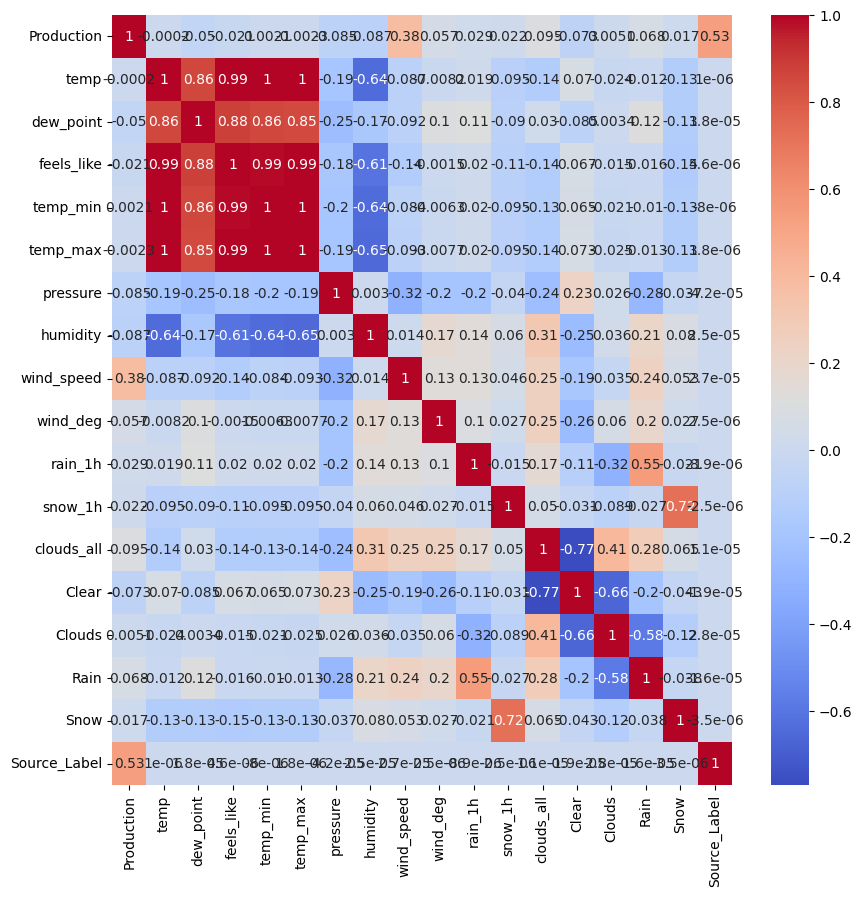

In [19]:
cols = [col for col in combined.columns if col not in ['dt_iso', 'Source']]

plt.subplots(figsize=(10,10))
sns.heatmap(combined.loc[:, cols].corr(), cmap='coolwarm', annot=True)

# We can see that temp, dew_point, feels_like, min and max are highly correlated, so we will drop
#
combined.drop(['dew_point', 'feels_like', 'temp_min', 'temp_max'], axis=1, inplace=True)

In [20]:
# Individual dataframes for production type
wind = combined.loc[combined['Source']=='Wind'].drop(['Source', 'Source_Label'], axis=1).reset_index(drop=True)
solar = combined.loc[combined['Source']=='Solar'].drop(['Source', 'Source_Label'], axis=1).reset_index(drop=True)
display(wind.head())
display(solar.head())

dt_iso  Production   temp  pressure  humidity  \
0 2020-07-22 00:00:00+00:00      4763.0  17.31      1021        80   
1 2020-07-22 01:00:00+00:00      4653.0  16.65      1021        79   
2 2020-07-22 02:00:00+00:00      4456.0  15.85      1020        79   
3 2020-07-22 03:00:00+00:00      4268.0  15.05      1020        83   
4 2020-07-22 04:00:00+00:00      3790.0  13.95      1020        87   

   wind_speed  wind_deg  rain_1h  snow_1h  clouds_all  Clear  Clouds  Rain  \
0        1.42        20     2.05      0.0          99    0.0     0.0   1.0   
1        0.67        35     0.39      0.0          77    0.0     0.0   1.0   
2        1.25       350     0.00      0.0          24    0.0     1.0   0.0   
3        1.61       358     0.00      0.0           1    1.0     0.0   0.0   
4        1.44       349     0.00      0.0           5    1.0     0.0   0.0   

   Snow  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

dt_iso  Production   temp  pressure  humidity  \
0 2020-07-22 00:00:00+00:00         0.0  17.31      1021        80   
1 2020-07-22 01:00:00+00:00         0.0  16.65      1021        79   
2 2020-07-22 02:00:00+00:00         0.0  15.85      1020        79   
3 2020-07-22 03:00:00+00:00         0.0  15.05      1020        83   
4 2020-07-22 04:00:00+00:00        15.0  13.95      1020        87   

   wind_speed  wind_deg  rain_1h  snow_1h  clouds_all  Clear  Clouds  Rain  \
0        1.42        20     2.05      0.0          99    0.0     0.0   1.0   
1        0.67        35     0.39      0.0          77    0.0     0.0   1.0   
2        1.25       350     0.00      0.0          24    0.0     1.0   0.0   
3        1.61       358     0.00      0.0           1    1.0     0.0   0.0   
4        1.44       349     0.00      0.0           5    1.0     0.0   0.0   

   Snow  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [21]:
# Reduced dataframe by combining rows into one if they are on the same date
energy_df = wind.merge(solar, on="dt_iso", suffixes=("_wind", "_solar"))
weather_df = df_weather[df_weather["dt_iso"].isin(energy_df["dt_iso"])].reset_index(drop=True)
mult_df = weather_df.merge(energy_df, on="dt_iso")
cols = [col for col in weather_df.columns]
cols.extend(['Production_wind', 'Production_solar'])
mult_df = mult_df[cols]
mult_df.drop(['dew_point', 'feels_like', 'temp_min', 'temp_max'], axis=1, inplace=True)
display(mult_df)

dt_iso   temp  pressure  humidity  wind_speed  \
0     2020-07-22 00:00:00+00:00  17.31      1021        80        1.42   
1     2020-07-22 01:00:00+00:00  16.65      1021        79        0.67   
2     2020-07-22 02:00:00+00:00  15.85      1020        79        1.25   
3     2020-07-22 03:00:00+00:00  15.05      1020        83        1.61   
4     2020-07-22 04:00:00+00:00  13.95      1020        87        1.44   
...                         ...    ...       ...       ...         ...   
25768 2023-06-30 17:00:00+00:00  19.74      1017        49        5.08   
25769 2023-06-30 18:00:00+00:00  18.81      1017        51        5.17   
25770 2023-06-30 19:00:00+00:00  17.41      1017        59        4.88   
25771 2023-06-30 20:00:00+00:00  16.00      1018        69        4.27   
25772 2023-06-30 21:00:00+00:00  15.41      1018        75        3.81   

       wind_deg  rain_1h  snow_1h  clouds_all  Clear  Clouds  Rain  Snow  \
0            20     2.05      0.0          99    0.0     0.0   1.0   0.0   
1            35     0.39      0.0          77    0.0     0.0   1.0   0.0   
2           350     0.00      0.0          24    0.0     1.0   0.0   0.0   
3           358     0.00      0.0           1    1.0     0.0   0.0   0.0   
4           349     0.00      0.0           5    1.0     0.0   0.0   0.0   
...         ...      ...      ...         ...    ...     ...   ...   ...   
25768       283     0.00      0.0          99    0.0     1.0   0.0   0.0   
25769       287     0.00      0.0         100    0.0     1.0   0.0   0.0   
25770       285     0.00      0.0         100    0.0     1.0   0.0   0.0   
25771       272     0.00      0.0         100    0.0     1.0   0.0   0.0   
25772       257     0.00      0.0         100    0.0     1.0   0.0   0.0   

       Production_wind  Production_solar  
0               4763.0               0.0  
1               4653.0               0.0  
2               4456.0               0.0  
3               4268.0               0.0  
4               3790.0              15.0  
...                ...               ...  
25768           5742.0            1273.0  
25769           5152.0             439.0  
25770           4857.0              50.0  
25771           5140.0               1.0  
25772           6135.0               1.0  

[25773 rows x 15 columns]

#Exploration on New Datasets

###Solar

In [22]:
solar.corr()['Production']

dt_iso        0.146642
Production    1.000000
temp          0.431053
pressure      0.059230
humidity     -0.515530
wind_speed   -0.046564
wind_deg     -0.097286
rain_1h      -0.027843
snow_1h      -0.023935
clouds_all   -0.102453
Clear         0.087741
Clouds       -0.057743
Rain         -0.010393
Snow         -0.034124
Name: Production, dtype: float64

###Wind

In [23]:
wind.corr()['Production']

dt_iso        0.098444
Production    1.000000
temp         -0.197388
pressure     -0.183264
humidity      0.074972
wind_speed    0.716233
wind_deg      0.148659
rain_1h       0.065466
snow_1h       0.050748
clouds_all    0.220631
Clear        -0.173402
Clouds        0.035736
Rain          0.130218
Snow          0.045995
Name: Production, dtype: float64

#Models

###Linear Regression

###Solar by itself

R2:  0.30235133789335755
Mean squared error : 1306.7433


Text(0.5, 0, 'Prediction Index')

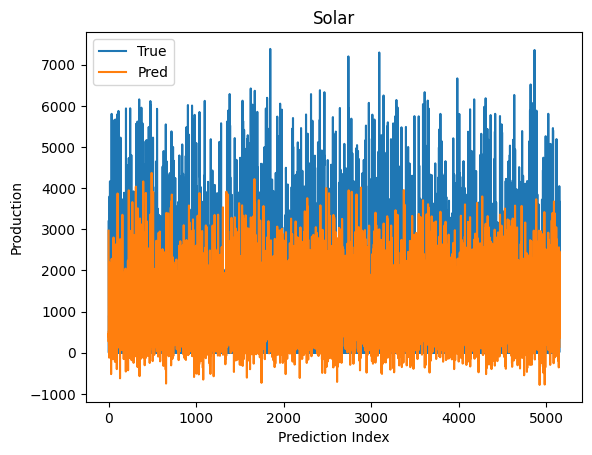

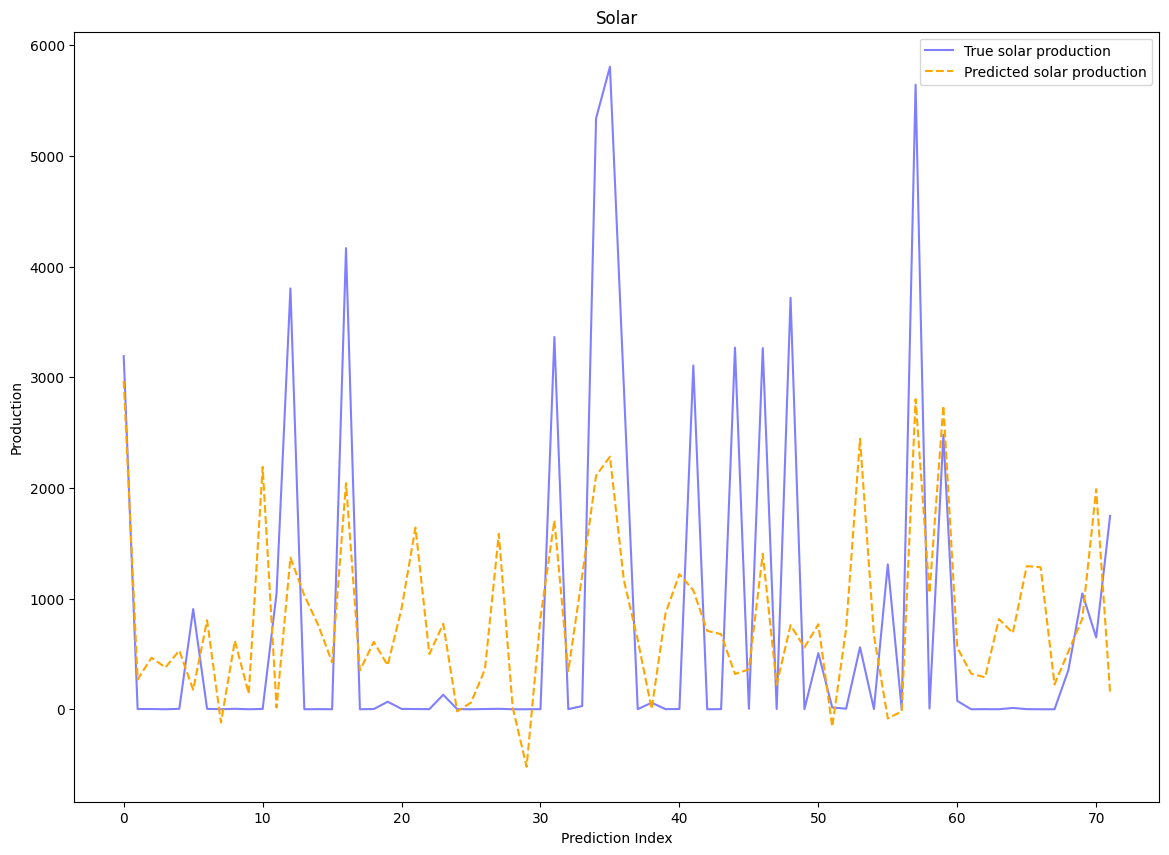

In [24]:
# Solar by itself

initial_x = solar[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]#'weather_main_label']]
initial_y = solar['Production']
x_train, x_test, y_train, y_test = train_test_split(initial_x, initial_y, test_size=0.2,shuffle=True,random_state = 42)
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_test)
#pred = [max(x,0) for x in pred]

print('R2: ', model.score(x_test, y_test))
mse = mean_squared_error(y_test, pred, squared=False)
print('Mean squared error :', round(mse, 4))
sns.lineplot(y_test.reset_index()['Production'], label='True')
sns.lineplot(pred, label='Pred')
plt.title('Solar')
plt.xlabel('Prediction Index')
plt.legend();

range_n =24 * 3
plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production'][:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred[:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.title('Solar')
plt.ylabel('Production')
plt.xlabel('Prediction Index')

In [25]:
# Import library for VIF
# Checking multicollinearity to see if it may make a difference
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

display(solar[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']].corr())
#calc_vif(solar[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']])
calc_vif(solar[['temp','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds']])

temp  pressure  humidity  wind_speed  wind_deg   rain_1h  \
temp        1.000000 -0.194549 -0.644985   -0.087182 -0.008154  0.019226   
pressure   -0.194549  1.000000  0.003077   -0.317152 -0.202830 -0.201823   
humidity   -0.644985  0.003077  1.000000    0.013810  0.170035  0.138651   
wind_speed -0.087182 -0.317152  0.013810    1.000000  0.130553  0.133805   
wind_deg   -0.008154 -0.202830  0.170035    0.130553  1.000000  0.100305   
rain_1h     0.019226 -0.201823  0.138651    0.133805  0.100305  1.000000   
snow_1h    -0.095357 -0.039644  0.060178    0.045939  0.026767 -0.014870   
clouds_all -0.137103 -0.243885  0.310498    0.252057  0.251049  0.166780   
Clear       0.070260  0.231322 -0.252769   -0.189265 -0.257939 -0.110333   
Clouds     -0.023701  0.025944  0.035745   -0.034959  0.059751 -0.317943   
Rain       -0.011791 -0.277817  0.208325    0.239943  0.195302  0.548794   
Snow       -0.133937 -0.036843  0.080141    0.052819  0.026738 -0.020632   

             snow_1h  clouds_all     Clear    Clouds      Rain      Snow  
temp       -0.095357   -0.137103  0.070260 -0.023701 -0.011791 -0.133937  
pressure   -0.039644   -0.243885  0.231322  0.025944 -0.277817 -0.036843  
humidity    0.060178    0.310498 -0.252769  0.035745  0.208325  0.080141  
wind_speed  0.045939    0.252057 -0.189265 -0.034959  0.239943  0.052819  
wind_deg    0.026767    0.251049 -0.257939  0.059751  0.195302  0.026738  
rain_1h    -0.014870    0.166780 -0.110333 -0.317943  0.548794 -0.020632  
snow_1h     1.000000    0.049576 -0.030903 -0.089053 -0.027096  0.720708  
clouds_all  0.049576    1.000000 -0.771153  0.408076  0.282197  0.064893  
Clear      -0.030903   -0.771153  1.000000 -0.660762 -0.201046 -0.042879  
Clouds     -0.089053    0.408076 -0.660762  1.000000 -0.579349 -0.123564  
Rain       -0.027096    0.282197 -0.201046 -0.579349  1.000000 -0.037596  
Snow        0.720708    0.064893 -0.042879 -0.123564 -0.037596  1.000000

variables        VIF
0        temp   3.435143
1    humidity  16.008206
2  wind_speed   4.945657
3    wind_deg   4.825040
4     rain_1h   1.486406
5     snow_1h   1.039177
6  clouds_all   9.522594
7       Clear   3.672306
8      Clouds   6.052364

R2:  0.28282591004078816
Mean squared error(Train) : 1324.9033


Text(0.5, 0, 'Prediction Index')

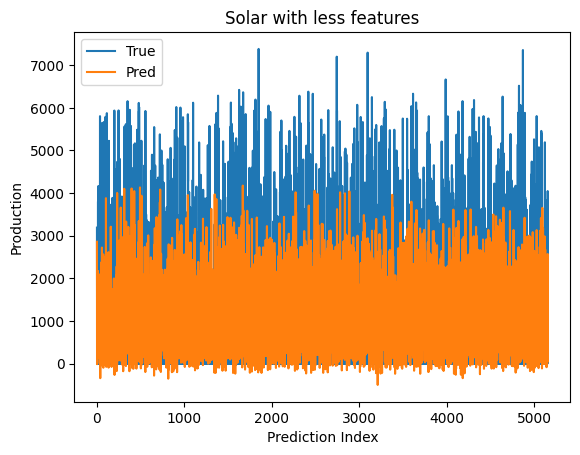

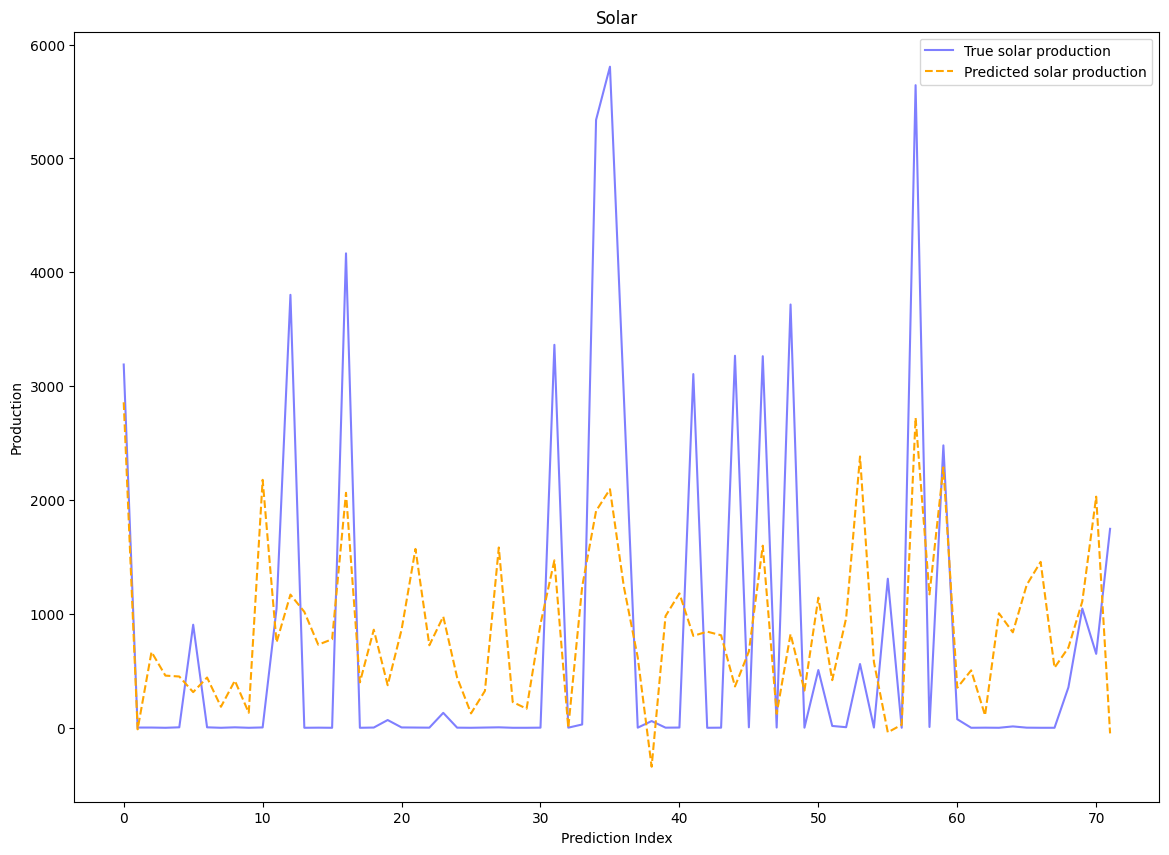

In [26]:
# Not shown, but tried different combinations of features based on multicollinearity
# Seemed to perform slightly worse in terms of MSE and R2
# Could be because Solar as a whole is a little weak

initial_x = solar[['temp','humidity','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds']]
initial_y = solar['Production']
x_train, x_test, y_train, y_test = train_test_split(initial_x, initial_y, test_size=0.2,shuffle=True,random_state = 42)
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_test)

print('R2: ', model.score(x_test, y_test))
mse = mean_squared_error(y_test, pred, squared=False)
print('Mean squared error(Train) :', round(mse, 4))
sns.lineplot(y_test.reset_index()['Production'], label='True')
sns.lineplot(pred, label='Pred')
plt.title('Solar with less features')
plt.xlabel('Prediction Index')
plt.legend();


range_n =24 * 3
plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production'][:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred[:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.title('Solar')
plt.ylabel('Production')
plt.xlabel('Prediction Index')
# We can see that while the error doesnt really change, it doesnt has as many neg values...


###Wind by itself

R2:  0.5411863213860559
Mean squared error(Train) : 2395.2941


Text(0.5, 0, 'Prediction Index')

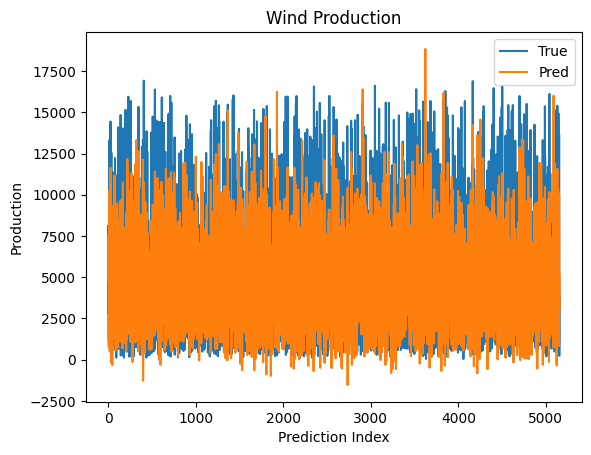

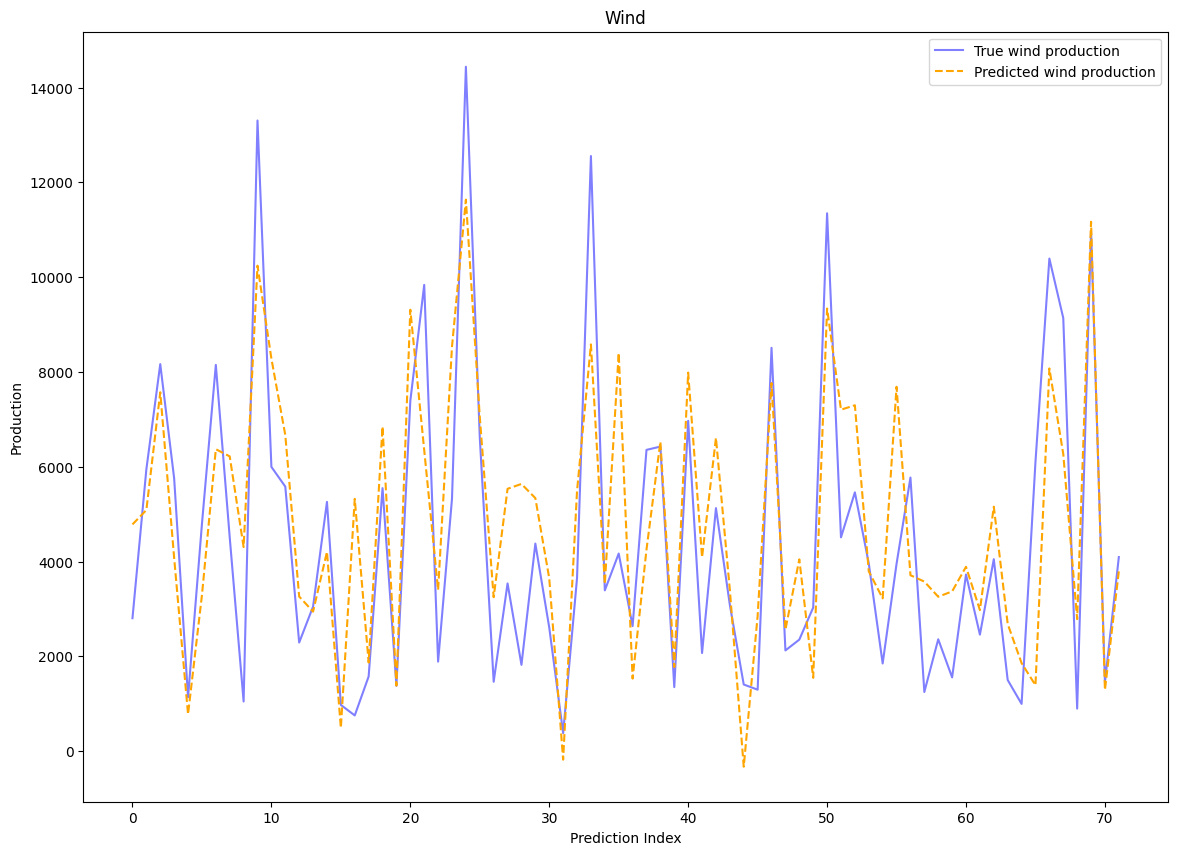

In [27]:
# Wind by itself
initial_x = wind[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]#'weather_main_label']]
initial_y = wind['Production']
x_train, x_test, y_train, y_test = train_test_split(initial_x, initial_y, test_size=0.2,shuffle=True,random_state = 42)
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_test)
#pred = [max(x, 0) for x in pred]

print('R2: ', model.score(x_test, y_test))
mse = mean_squared_error(y_test, pred, squared=False)
print('Mean squared error(Train) :', round(mse, 4))
sns.lineplot(y_test.reset_index()['Production'], label='True')
sns.lineplot(pred, label='Pred')
plt.title('Wind Production')
plt.xlabel('Prediction Index')
plt.legend();

range_n =24 * 3
plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production'][:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred[:range_n],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.title('Wind')
plt.ylabel('Production')
plt.xlabel('Prediction Index')

In [28]:
# Import library for VIF
# Checking multicollinearity to see if it may make a difference

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

display(wind[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']].corr())
#calc_vif(wind[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']])
calc_vif(solar[['temp', 'pressure', 'humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds']])

temp  pressure  humidity  wind_speed  wind_deg   rain_1h  \
temp        1.000000 -0.194543 -0.644967   -0.087183 -0.008154  0.019225   
pressure   -0.194543  1.000000  0.003021   -0.317175 -0.202826 -0.201794   
humidity   -0.644967  0.003021  1.000000    0.013817  0.170037  0.138637   
wind_speed -0.087183 -0.317175  0.013817    1.000000  0.130545  0.133786   
wind_deg   -0.008154 -0.202826  0.170037    0.130545  1.000000  0.100304   
rain_1h     0.019225 -0.201794  0.138637    0.133786  0.100304  1.000000   
snow_1h    -0.095357 -0.039637  0.060173    0.045934  0.026767 -0.014869   
clouds_all -0.137098 -0.243897  0.310516    0.252026  0.251050  0.166773   
Clear       0.070258  0.231350 -0.252785   -0.189280 -0.257939 -0.110323   
Clouds     -0.023699  0.025882  0.035779   -0.034918  0.059753 -0.317949   
Rain       -0.011791 -0.277767  0.208299    0.239907  0.195298  0.548796   
Snow       -0.133937 -0.036834  0.080135    0.052812  0.026737 -0.020631   

             snow_1h  clouds_all     Clear    Clouds      Rain      Snow  
temp       -0.095357   -0.137098  0.070258 -0.023699 -0.011791 -0.133937  
pressure   -0.039637   -0.243897  0.231350  0.025882 -0.277767 -0.036834  
humidity    0.060173    0.310516 -0.252785  0.035779  0.208299  0.080135  
wind_speed  0.045934    0.252026 -0.189280 -0.034918  0.239907  0.052812  
wind_deg    0.026767    0.251050 -0.257939  0.059753  0.195298  0.026737  
rain_1h    -0.014869    0.166773 -0.110323 -0.317949  0.548796 -0.020631  
snow_1h     1.000000    0.049574 -0.030901 -0.089055 -0.027093  0.720708  
clouds_all  0.049574    1.000000 -0.771148  0.408079  0.282183  0.064890  
Clear      -0.030901   -0.771148  1.000000 -0.660770 -0.201027 -0.042875  
Clouds     -0.089055    0.408079 -0.660770  1.000000 -0.579356 -0.123566  
Rain       -0.027093    0.282183 -0.201027 -0.579356  1.000000 -0.037593  
Snow        0.720708    0.064890 -0.042875 -0.123566 -0.037593  1.000000

variables         VIF
0        temp    6.307251
1    pressure  104.969981
2    humidity   46.534560
3  wind_speed    5.603325
4    wind_deg    4.854609
5     rain_1h    1.499122
6     snow_1h    1.048441
7  clouds_all   10.112108
8       Clear    5.612847
9      Clouds    8.073714

R2:  0.5413193019262698
Mean squared error(Train) : 2394.9469


Text(0.5, 0, 'Prediction Index')

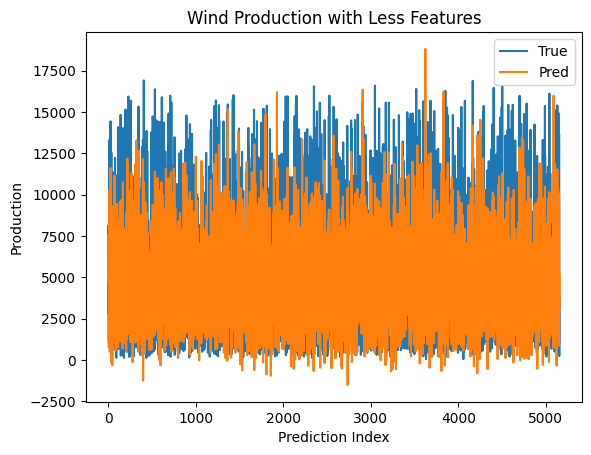

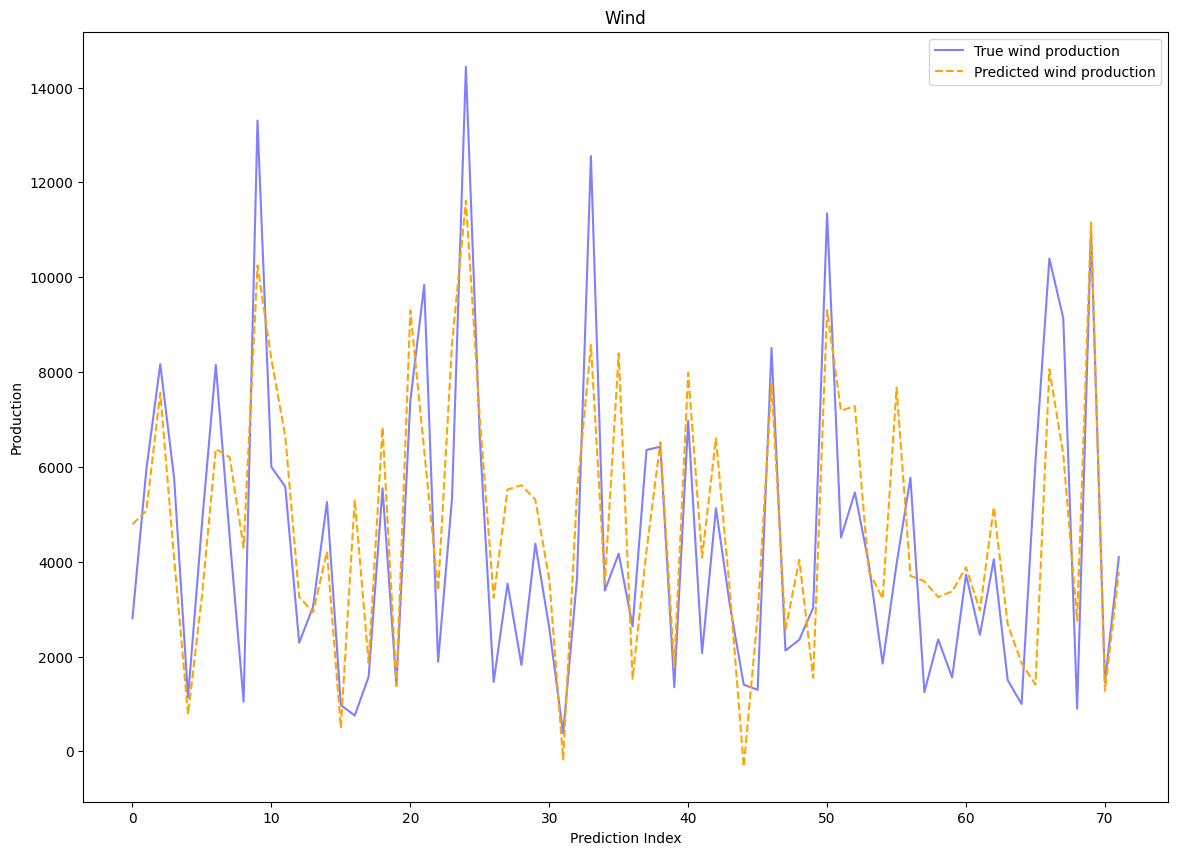

In [29]:
# Wind by itself
# Extremely slight improvements


initial_x = wind[['temp','pressure','humidity','wind_speed','wind_deg','clouds_all', 'Clear', 'Rain']]#'weather_main_label']]
initial_y = wind['Production']
x_train, x_test, y_train, y_test = train_test_split(initial_x, initial_y, test_size=0.2,shuffle=True,random_state = 42)
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_test)
#pred = [max(x, 0) for x in pred]

print('R2: ', model.score(x_test, y_test))
mse = mean_squared_error(y_test, pred, squared=False)
print('Mean squared error(Train) :', round(mse, 4))
sns.lineplot(y_test.reset_index()['Production'], label='True')
sns.lineplot(pred, label='Pred')
plt.title('Wind Production with Less Features')
plt.xlabel('Prediction Index')
plt.legend();

range_n =24 * 3
plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production'][:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred[:range_n],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.title('Wind')
plt.ylabel('Production')
plt.xlabel('Prediction Index')

From testing, it seems like slight improvements can be made through feature selection for each production type. However, it does not seem to be much of an improvement. This could either imply user error, or that the data is not exactly linear

###MultiOutputRegressor

For simplicity, a multioutputregressor is used to generalize the modeling process.

# Baseline MultiOutputRegressor

Root Mean squared error(Solar) : 1302.3213
Root Mean Squared Error(Wind):  2395.2941
r2 (Solar):  0.3063751674874081
 r2 (Wind):  0.5411863213860559



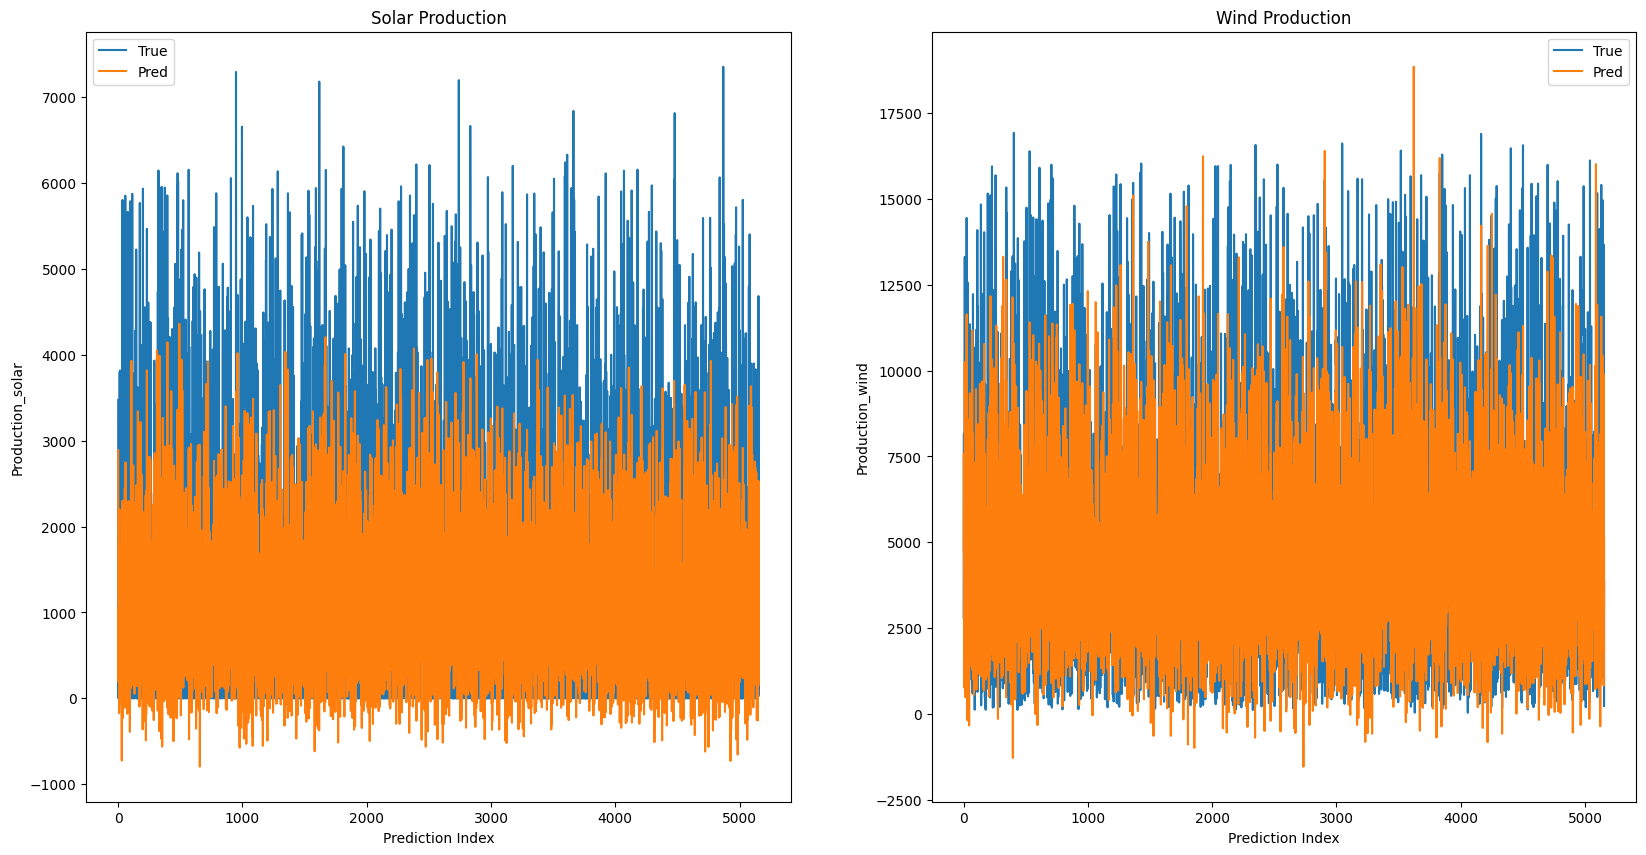

In [30]:
# MultiOutputRegressor
# Output is basically the same as the individual


x = mult_df[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]#'weather_main_label']]
y = mult_df[['Production_solar','Production_wind']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True,random_state = 42)
mult_out = MultiOutputRegressor(LinearRegression()).fit(x_train, y_train)
pred = mult_out.predict(x_test)
mse_sol = mean_squared_error(y_test['Production_solar'], pred[:, 0], squared=False)
mse_wind = mean_squared_error(y_test['Production_wind'], pred[:, 1], squared=False)
print('Root Mean squared error(Solar) :', round(mse_sol, 4))
print('Root Mean Squared Error(Wind): ', round(mse_wind,4))

print('r2 (Solar): ', r2_score(y_test['Production_solar'], pred[:, 0]))
print(' r2 (Wind): ', r2_score(y_test['Production_wind'], pred[:, 1]))

print()

fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.lineplot(y_test.reset_index()['Production_solar'], label='True', ax=axes[0])
sns.lineplot(pred[:, 0], label='Pred', ax=axes[0])
axes[0].set_title('Solar Production')


sns.lineplot(y_test.reset_index()['Production_wind'], label='True', ax=axes[1])
sns.lineplot(pred[:, 1], label='Pred', ax=axes[1])
axes[1].set_title('Wind Production')


axes[0].set_xlabel('Prediction Index')
axes[1].set_xlabel('Prediction Index')
plt.legend();


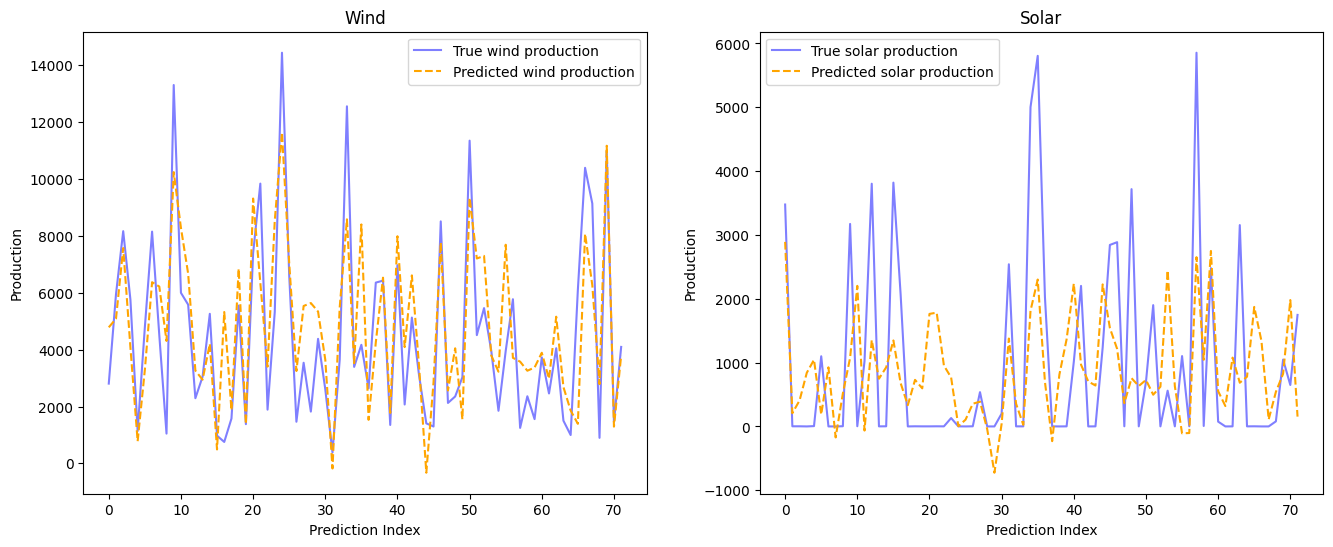

In [31]:
range_n = 24 * 3
fig, axes = plt.subplots(1, 2, figsize=(16,6))
#plt.figure(figsize=(8,6))
#plt.figure(figsize=(14, 10))
axes[0].plot(
    y_test.reset_index()['Production_wind'][:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
axes[0].plot(
    pred[:, 1][:range_n],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
axes[0].set_ylabel('Production')
axes[0].set_xlabel('Prediction Index')
axes[0].set_title('Wind')
axes[0].legend()
#plt.legend()
#plt.title('Wind')
#plt.ylabel('Production')
#plt.xlabel('Prediction Index')
#plt.show()

#plt.figure(figsize=(8,6))
#plt.figure(figsize=(14, 10))
axes[1].plot(
    y_test.reset_index()['Production_solar'][:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
axes[1].plot(
    pred[:, 0][:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
axes[1].legend()
axes[1].set_title('Solar')
axes[1].set_ylabel('Production')
axes[1].set_xlabel('Prediction Index')
plt.show()

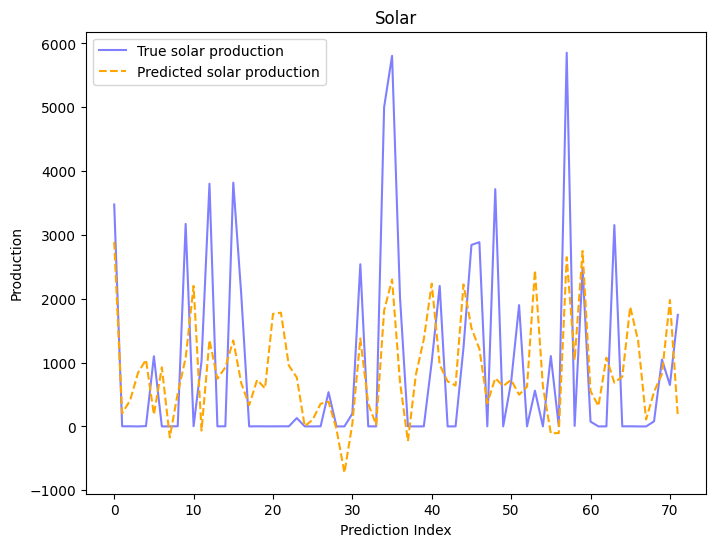

In [32]:
range_n =24 * 3
plt.figure(figsize=(8,6))
#plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production_solar'][:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred[:, 0][:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.title('Solar')
plt.ylabel('Production')
plt.xlabel('Prediction Index')
plt.show()

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.lineplot(y_test.reset_index()['Production_solar'], label='True', ax=axes[0])
sns.lineplot(pred[:, 0], label='Pred', ax=axes[0])
axes[0].set_title('Solar Production')

range_n =24 * 3
#plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production_solar'][:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred[:, 0][:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
axes[0].set_xlabel('Prediction Index')
plt.ylabel('Production')
plt.xlabel('Prediction Index')
plt.title('Solar')
plt.show()

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.lineplot(y_test.reset_index()['Production_wind'], label='True', ax=axes[0])
sns.lineplot(pred[:, 1], label='Pred', ax=axes[0])
axes[0].set_title('Wind Production')

range_n =24 * 3
#plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production_wind'][:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred[:, 1][:range_n],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
axes[0].set_xlabel('Prediction Index')
plt.ylabel('Production')
plt.xlabel('Prediction Index')
plt.title('Wind')
plt.show()

### Linear Regression with Polynomial Features

Root Mean squared error(Solar) : 1258.1893
Root Mean Squared Error(Wind):  2111.1018
r2 (Solar):  0.35258867164466656
 r2 (Wind):  0.6436005378352205



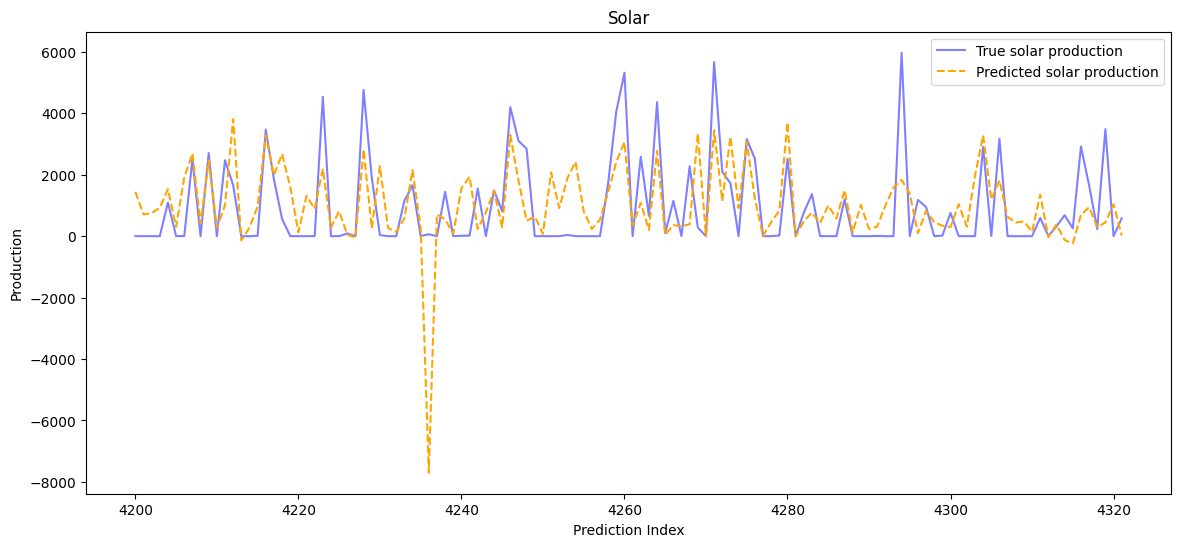

In [35]:
from sklearn.preprocessing import PolynomialFeatures
x = mult_df[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]#'weather_main_label']]
y = mult_df[['Production_solar','Production_wind']]

# Change degree
poly = PolynomialFeatures(degree=3)
poly_x = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.2,shuffle=True,random_state = 42)
mult_out = MultiOutputRegressor(LinearRegression()).fit(x_train, y_train)
pred = mult_out.predict(x_test)
mse_sol = mean_squared_error(y_test['Production_solar'], pred[:, 0], squared=False)
mse_wind = mean_squared_error(y_test['Production_wind'], pred[:, 1], squared=False)
print('Root Mean squared error(Solar) :', round(mse_sol, 4))
print('Root Mean Squared Error(Wind): ', round(mse_wind,4))


print('r2 (Solar): ', r2_score(y_test['Production_solar'], pred[:, 0]))
print(' r2 (Wind): ', r2_score(y_test['Production_wind'], pred[:, 1]))

print()

fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.lineplot(y_test.reset_index()['Production_solar'], label='True', ax=axes[0])
sns.lineplot(pred[:, 0], label='Pred', ax=axes[0])
axes[0].set_title('Solar Production')
axes[0].set_xlabel('Prediction Index')

sns.lineplot(y_test.reset_index()['Production_wind'], label='True', ax=axes[1])
sns.lineplot(pred[:, 1], label='Pred', ax=axes[1])
axes[1].set_title('Wind Production')
axes[1].set_xlabel('Prediction Index')


plt.legend();

pred_test = pd.DataFrame(pred)

range_n = 4250 + (24 * 3)
plt.figure(figsize=(14, 6))
plt.plot(
    y_test.reset_index()['Production_wind'][4200:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    #pred[:, 1][4000:range_n],
    pred_test.iloc[4200:range_n][1],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.ylabel('Production')
plt.xlabel('Prediction Index')
plt.title('Wind')
plt.show();

range_n = 4250 + (24 * 3)
plt.figure(figsize=(14, 6))
plt.plot(
    y_test.reset_index()['Production_solar'][4200:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    #pred[:, 0][4000:range_n],
    pred_test.iloc[4200:range_n][0],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.ylabel('Production')
plt.xlabel('Prediction Index')
plt.title('Solar')
plt.show();


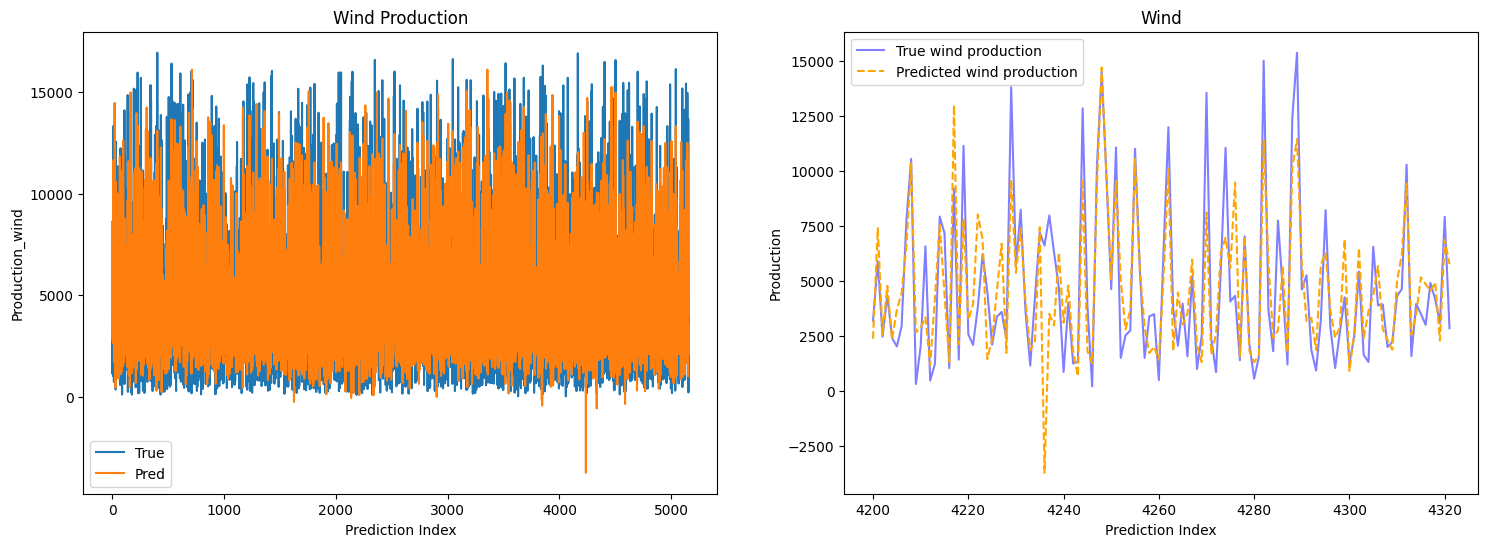

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.lineplot(y_test.reset_index()['Production_wind'], label='True', ax=axes[0])
sns.lineplot(pred[:, 1], label='Pred', ax=axes[0])
axes[0].set_title('Wind Production')

range_n =4250 + (24 * 3)
#plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production_wind'][4200:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred_test.iloc[4200:range_n][1],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
axes[0].set_xlabel('Prediction Index')
plt.ylabel('Production')
plt.xlabel('Prediction Index')
plt.title('Wind')
plt.show()

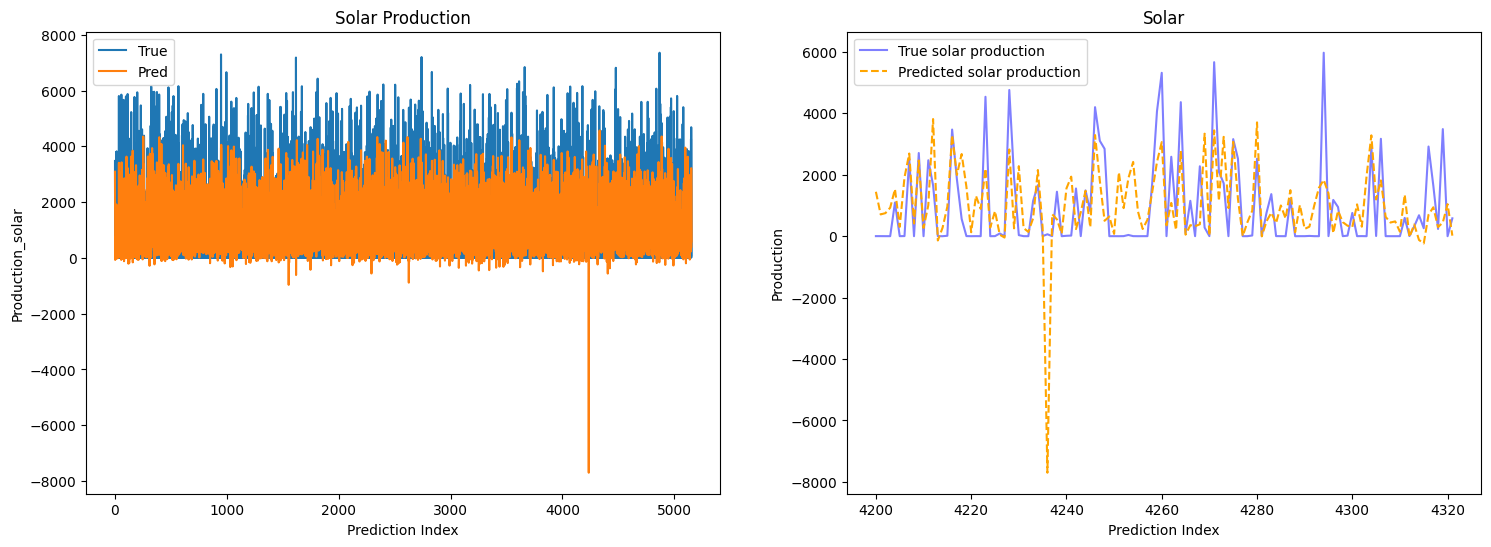

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.lineplot(y_test.reset_index()['Production_solar'], label='True', ax=axes[0])
sns.lineplot(pred[:, 0], label='Pred', ax=axes[0])
axes[0].set_title('Solar Production')

range_n =4250 + (24 * 3)
#plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production_solar'][4200:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred_test.iloc[4200:range_n][0],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
axes[0].set_xlabel('Prediction Index')
plt.ylabel('Production')
plt.xlabel('Prediction Index')
plt.title('Solar')
plt.show()

In [38]:
range_n = 4250 + (24 * 3)
fig, axes = plt.subplots(1, 2, figsize=(16,6))
#plt.figure(figsize=(8,6))
#plt.figure(figsize=(14, 10))
axes[0].plot(
    y_test.reset_index()['Production_wind'][4200:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
axes[0].plot(
    pred_test.iloc[4200:range_n][1],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
axes[0].set_ylabel('Production')
axes[0].set_xlabel('Prediction Index')
axes[0].set_title('Wind')
axes[0].legend()
#plt.legend()
#plt.title('Wind')
#plt.ylabel('Production')
#plt.xlabel('Prediction Index')
#plt.show()

#plt.figure(figsize=(8,6))
#plt.figure(figsize=(14, 10))
axes[1].plot(
    y_test.reset_index()['Production_solar'][4200:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
axes[1].plot(
    pred_test.iloc[4200:range_n][0],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
axes[1].legend()
axes[1].set_title('Solar')
axes[1].set_ylabel('Production')
axes[1].set_xlabel('Prediction Index')
plt.show()

The Polynomial Features transformation seemed to improve the model by quite a bit. However, it made it more sensitive, as can be seen in the visuals.

# Individual Tests using Polynomial Features and Feature Selection

R2:  0.33155537440453775
Mean squared error: 1279.1003


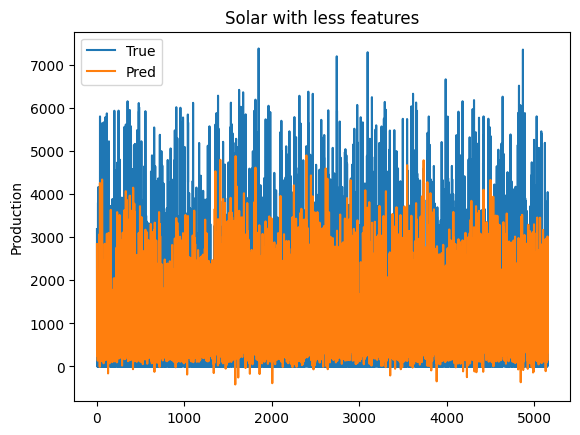

In [39]:
# Not shown, but tried different combinations of features based on multicollinearity
# Seemed to perform slightly worse in terms of MSE and R2
# Could be because Solar as a whole is a little weak

#initial_x = solar[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]
initial_x = solar[['temp', 'humidity', 'pressure', 'clouds_all']]
initial_y = solar['Production']
poly_solar = PolynomialFeatures(degree=5)
poly_sol = poly_solar.fit_transform(initial_x)

x_train, x_test, y_train, y_test_sol = train_test_split(poly_sol, initial_y, test_size=0.2,shuffle=True,random_state = 42)
model_sol_ind = LinearRegression().fit(x_train, y_train)
pred_sol_ind = model_sol_ind.predict(x_test)

print('R2: ', model_sol_ind.score(x_test, y_test_sol))
mse = mean_squared_error(y_test_sol, pred_sol_ind, squared=False)
print('Mean squared error:', round(mse, 4))
sns.lineplot(y_test_sol.reset_index()['Production'], label='True')
sns.lineplot(pred_sol_ind, label='Pred')
plt.title('Solar with less features')
plt.legend();

range_n =24 * 3
plt.figure(figsize=(14, 10))
plt.plot(
    y_test_sol.reset_index()['Production'][:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred_sol_ind[:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.title('Solar')
plt.ylabel('Production')
plt.xlabel('Prediction Index')
plt.show()

# We can see that while the error doesnt really change, it doesnt has as many neg values...

R2:  0.6680549764110695
Mean squared error(Train) : 2037.388


Text(0.5, 0, 'Prediction Index')

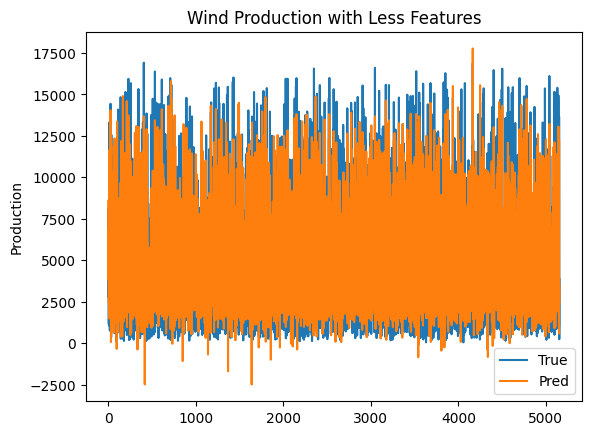

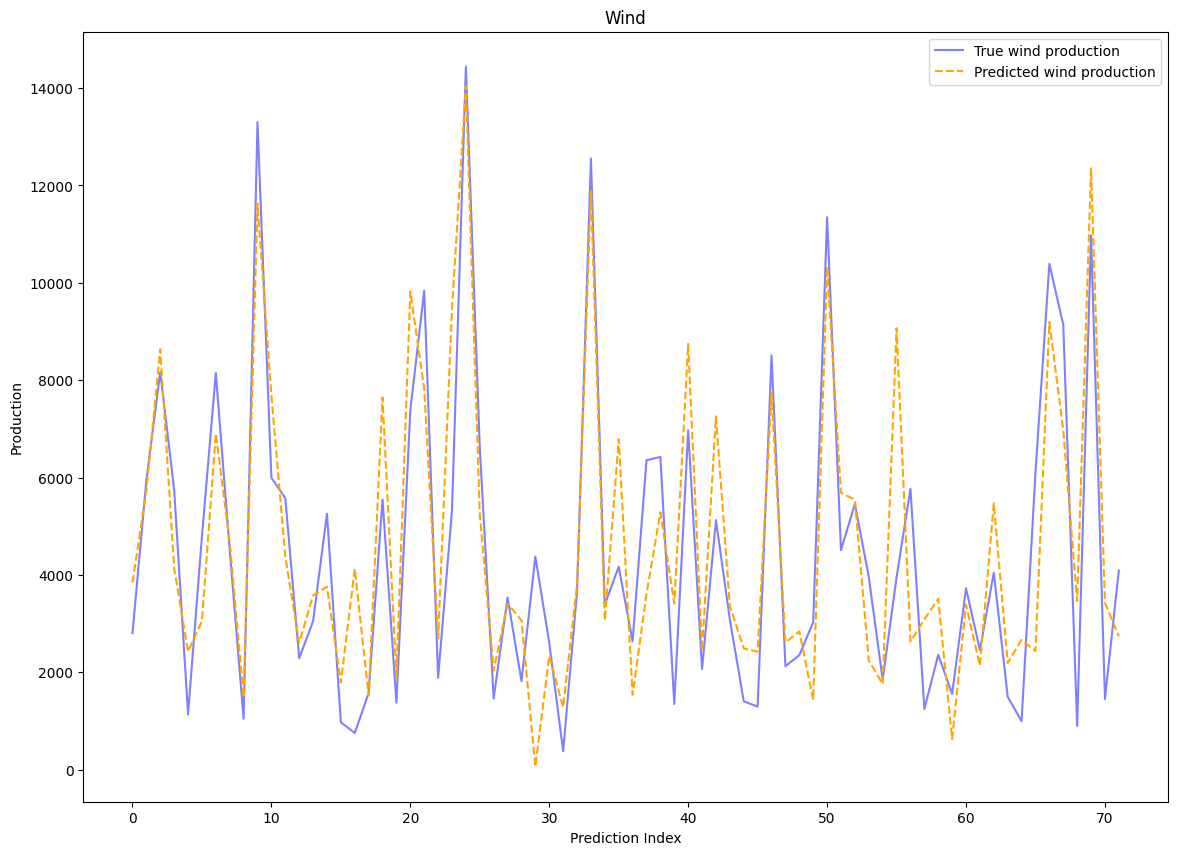

In [55]:
# Wind by itself
# Extremely slight improvements

#initial_x = wind[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]
initial_x = wind[['temp','pressure','humidity','wind_speed','wind_deg','clouds_all', 'Clear', 'Rain']]#'weather_main_label']]
initial_y = wind['Production']
poly_wind = PolynomialFeatures(degree=5)
poly_win = poly_wind.fit_transform(initial_x)
x_train, x_test, y_train, y_test = train_test_split(poly_win, initial_y, test_size=0.2,shuffle=True,random_state = 42)
model_wind_ind = LinearRegression().fit(x_train, y_train)
pred_wind_ind = model_wind_ind.predict(x_test)
#pred = [max(x, 0) for x in pred]

print('R2: ', model_wind_ind.score(x_test, y_test))
mse = mean_squared_error(y_test, pred_wind_ind, squared=False)
print('Mean squared error(Train) :', round(mse, 4))
sns.lineplot(y_test.reset_index()['Production'], label='True')
sns.lineplot(pred_wind_ind, label='Pred')
plt.title('Wind Production with Less Features')
plt.legend();

range_n =24 * 3
plt.figure(figsize=(14, 10))
plt.plot(
    y_test.reset_index()['Production'][:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    pred_wind_ind[:range_n],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.title('Wind')
plt.ylabel('Production')
plt.xlabel('Prediction Index')

In [56]:
range_n =24 * 3
fig, axes = plt.subplots(1, 2, figsize=(16,6))
axes[1].plot(
    y_test_sol.reset_index()['Production'][:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
axes[1].plot(
    pred_sol_ind[:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
axes[1].legend()
axes[1].set_title('Solar')
axes[1].set_ylabel('Production')
axes[1].set_xlabel('Prediction Index')


axes[0].plot(
    y_test.reset_index()['Production'][:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
axes[0].plot(
    pred_wind_ind[:range_n],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
axes[0].legend()
axes[0].set_title('Wind')
axes[0].set_ylabel('Production')
axes[0].set_xlabel('Prediction Index')

plt.show()

Tried various combinations of features based on the initial VIF done earlier.
Solar does not seem to improve much with polynomial features.
wind seems to improve slightly, but only with feature selection.

###Classification (Attempted, but dropped)

Classification was attempted in the early stages of our project. We determined that we should not use it since its performance was poor and it did not exactly fit with our problem statement.

In [ ]:
# Checking how many solar production values are greater than wind
count = 0
for index, row in mult_df.iterrows():
    if row['Production_solar'] >= row['Production_wind']:
      count+=1
print(count)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


ini_X = combined[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]
ini_X = (ini_X - ini_X.min()) / (ini_X.max() - ini_X.min())
ini_Y = combined['Source']
x_train, x_test, y_train, y_test = train_test_split(ini_X, ini_Y, test_size=0.2,shuffle=True,random_state = 42)
log_model = LogisticRegression().fit(x_train, y_train)
pred = log_model.predict(x_test)

print('Acc: ', log_model.score(x_test, y_test))
print(classification_report(pred, y_test))

The accuracy for this initial model is around 50%. This makes sense because the dataset has 2 entires per day; one for wind and one for solar. This means that the model likely just randomly picks one of the source types because they have the same weather features.

In [ ]:
combined

###Trying to improve classification

In [ ]:
# Creating dataframe that contains the source of the higher production for that day; mostly wind
test_wind = combined.loc[combined['Source']=='Wind'].drop(['Source_Label'], axis=1).reset_index(drop=True)
test_solar = combined.loc[combined['Source']=='Solar'].drop(['Source_Label'], axis=1).reset_index(drop=True)
test_energy_df = test_wind.merge(test_solar, on="dt_iso", suffixes=("_wind", "_solar"))
test_weather_df = df_weather[df_weather["dt_iso"].isin(energy_df["dt_iso"])].reset_index(drop=True)
test_mult_df = test_weather_df.merge(test_energy_df, on="dt_iso")
cols = [col for col in weather_df.columns]
cols.extend(['Production_wind', 'Production_solar', 'Source_wind', 'Source_solar'])
test_mult_df = test_mult_df[cols]
test_mult_df.drop(['dew_point', 'feels_like', 'temp_min', 'temp_max'], axis=1, inplace=True)
display(test_mult_df)

import numpy as np
test_mult_df['Source'] = np.where(test_mult_df['Production_wind'] > test_mult_df['Production_solar'], 'Wind', 'Solar')

display(test_mult_df)

In [ ]:
test_mult_df.drop(['Production_wind', 'Production_solar','Source_wind', 'Source_solar'], axis=1,inplace=True)

In [ ]:
display(test_mult_df)

In [ ]:
test_mult_df['Source'].value_counts()

In [ ]:
testing = (
    test_mult_df.groupby("Source")
    .apply(lambda x: x.sample(n=10000, random_state=42, replace=True))
    .reset_index(drop=True)
)
display(testing)

In [ ]:
# Using down and up sampling to balance out wind v solar
ini_X = testing[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']] #'weather_main_label']]
ini_X = (ini_X - ini_X.min()) / (ini_X.max() - ini_X.min())
ini_Y = testing['Source']
x_train, x_test, y_train, y_test = train_test_split(ini_X, ini_Y, test_size=0.2,shuffle=True,random_state = 42)
log_model = LogisticRegression(max_iter=2000).fit(x_train, y_train)
pred = log_model.predict(x_test)

print('Acc: ', log_model.score(x_test, y_test))
print(classification_report(pred, y_test))

In [ ]:
# Using the model from the up/down sampled data, test on non downsampled data
# Wind seems to be decent, solar is still not great
ok_test = test_mult_df[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']] #'weather_main_label']]
norm_test = (ok_test - ok_test.min())/(ok_test.max()-ok_test.min())
ok = log_model.predict(norm_test[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]) #'weather_main_label']])
print(classification_report(ok, test_mult_df['Source']))

In [ ]:
# Wanted to see if LogRegression class weights did something; tldr, kind of helps but not really
ini_X = test_mult_df[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]#'weather_main_label']]
ini_X = (ini_X - ini_X.min()) / (ini_X.max() - ini_X.min())
ini_Y = test_mult_df['Source']
x_train, x_test, y_train, y_test = train_test_split(ini_X, ini_Y, test_size=0.2,shuffle=True,random_state = 42, stratify=ini_Y)
log_model = LogisticRegression(class_weight={'Solar':1.5, 'Wind':0.2}).fit(x_train, y_train)
pred = log_model.predict(x_test)

print('Acc: ', log_model.score(x_test, y_test))
print(classification_report(pred, y_test))

In [ ]:
# Tessting on the class weight model
ok_test = test_mult_df[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']] #'weather_main_label']]
norm_test = (ok_test - ok_test.min())/(ok_test.max()-ok_test.min())
ok = log_model.predict(norm_test[['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','snow_1h','clouds_all', 'Clear', 'Clouds', 'Rain', 'Snow']]) #'weather_main_label']])
print(classification_report(ok, test_mult_df['Source']))

In [ ]:
# This seems to just increase wind; not so much for solar.
# Used randomizedsearch to get a general estimate
from sklearn.model_selection import RandomizedSearchCV
log_test = LogisticRegression(max_iter=2000)
param_grid = [{'penalty':['l1','l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['lbfgs', 'newton-cg', 'sag', 'saga']}]
clf = RandomizedSearchCV(log_test, param_grid)
clf.fit(x_train, y_train)

clf_pred = clf.predict(x_test)

print(classification_report(y_test, clf_pred))
print(clf.best_params_)
